# ANN Using Pytorch 

every detail explanation is provided in pytorch org

# Loading Dataset

In [34]:
import pandas as pd
df=pd.read_csv("heart2.csv")
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [35]:
# checking null values

df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [36]:
import seaborn as sns  
# this is for plotting in visuals

In [37]:
import numpy as np
df['target']=np.where(df['target']==1,"Heart Attack","No Heart Attack ")

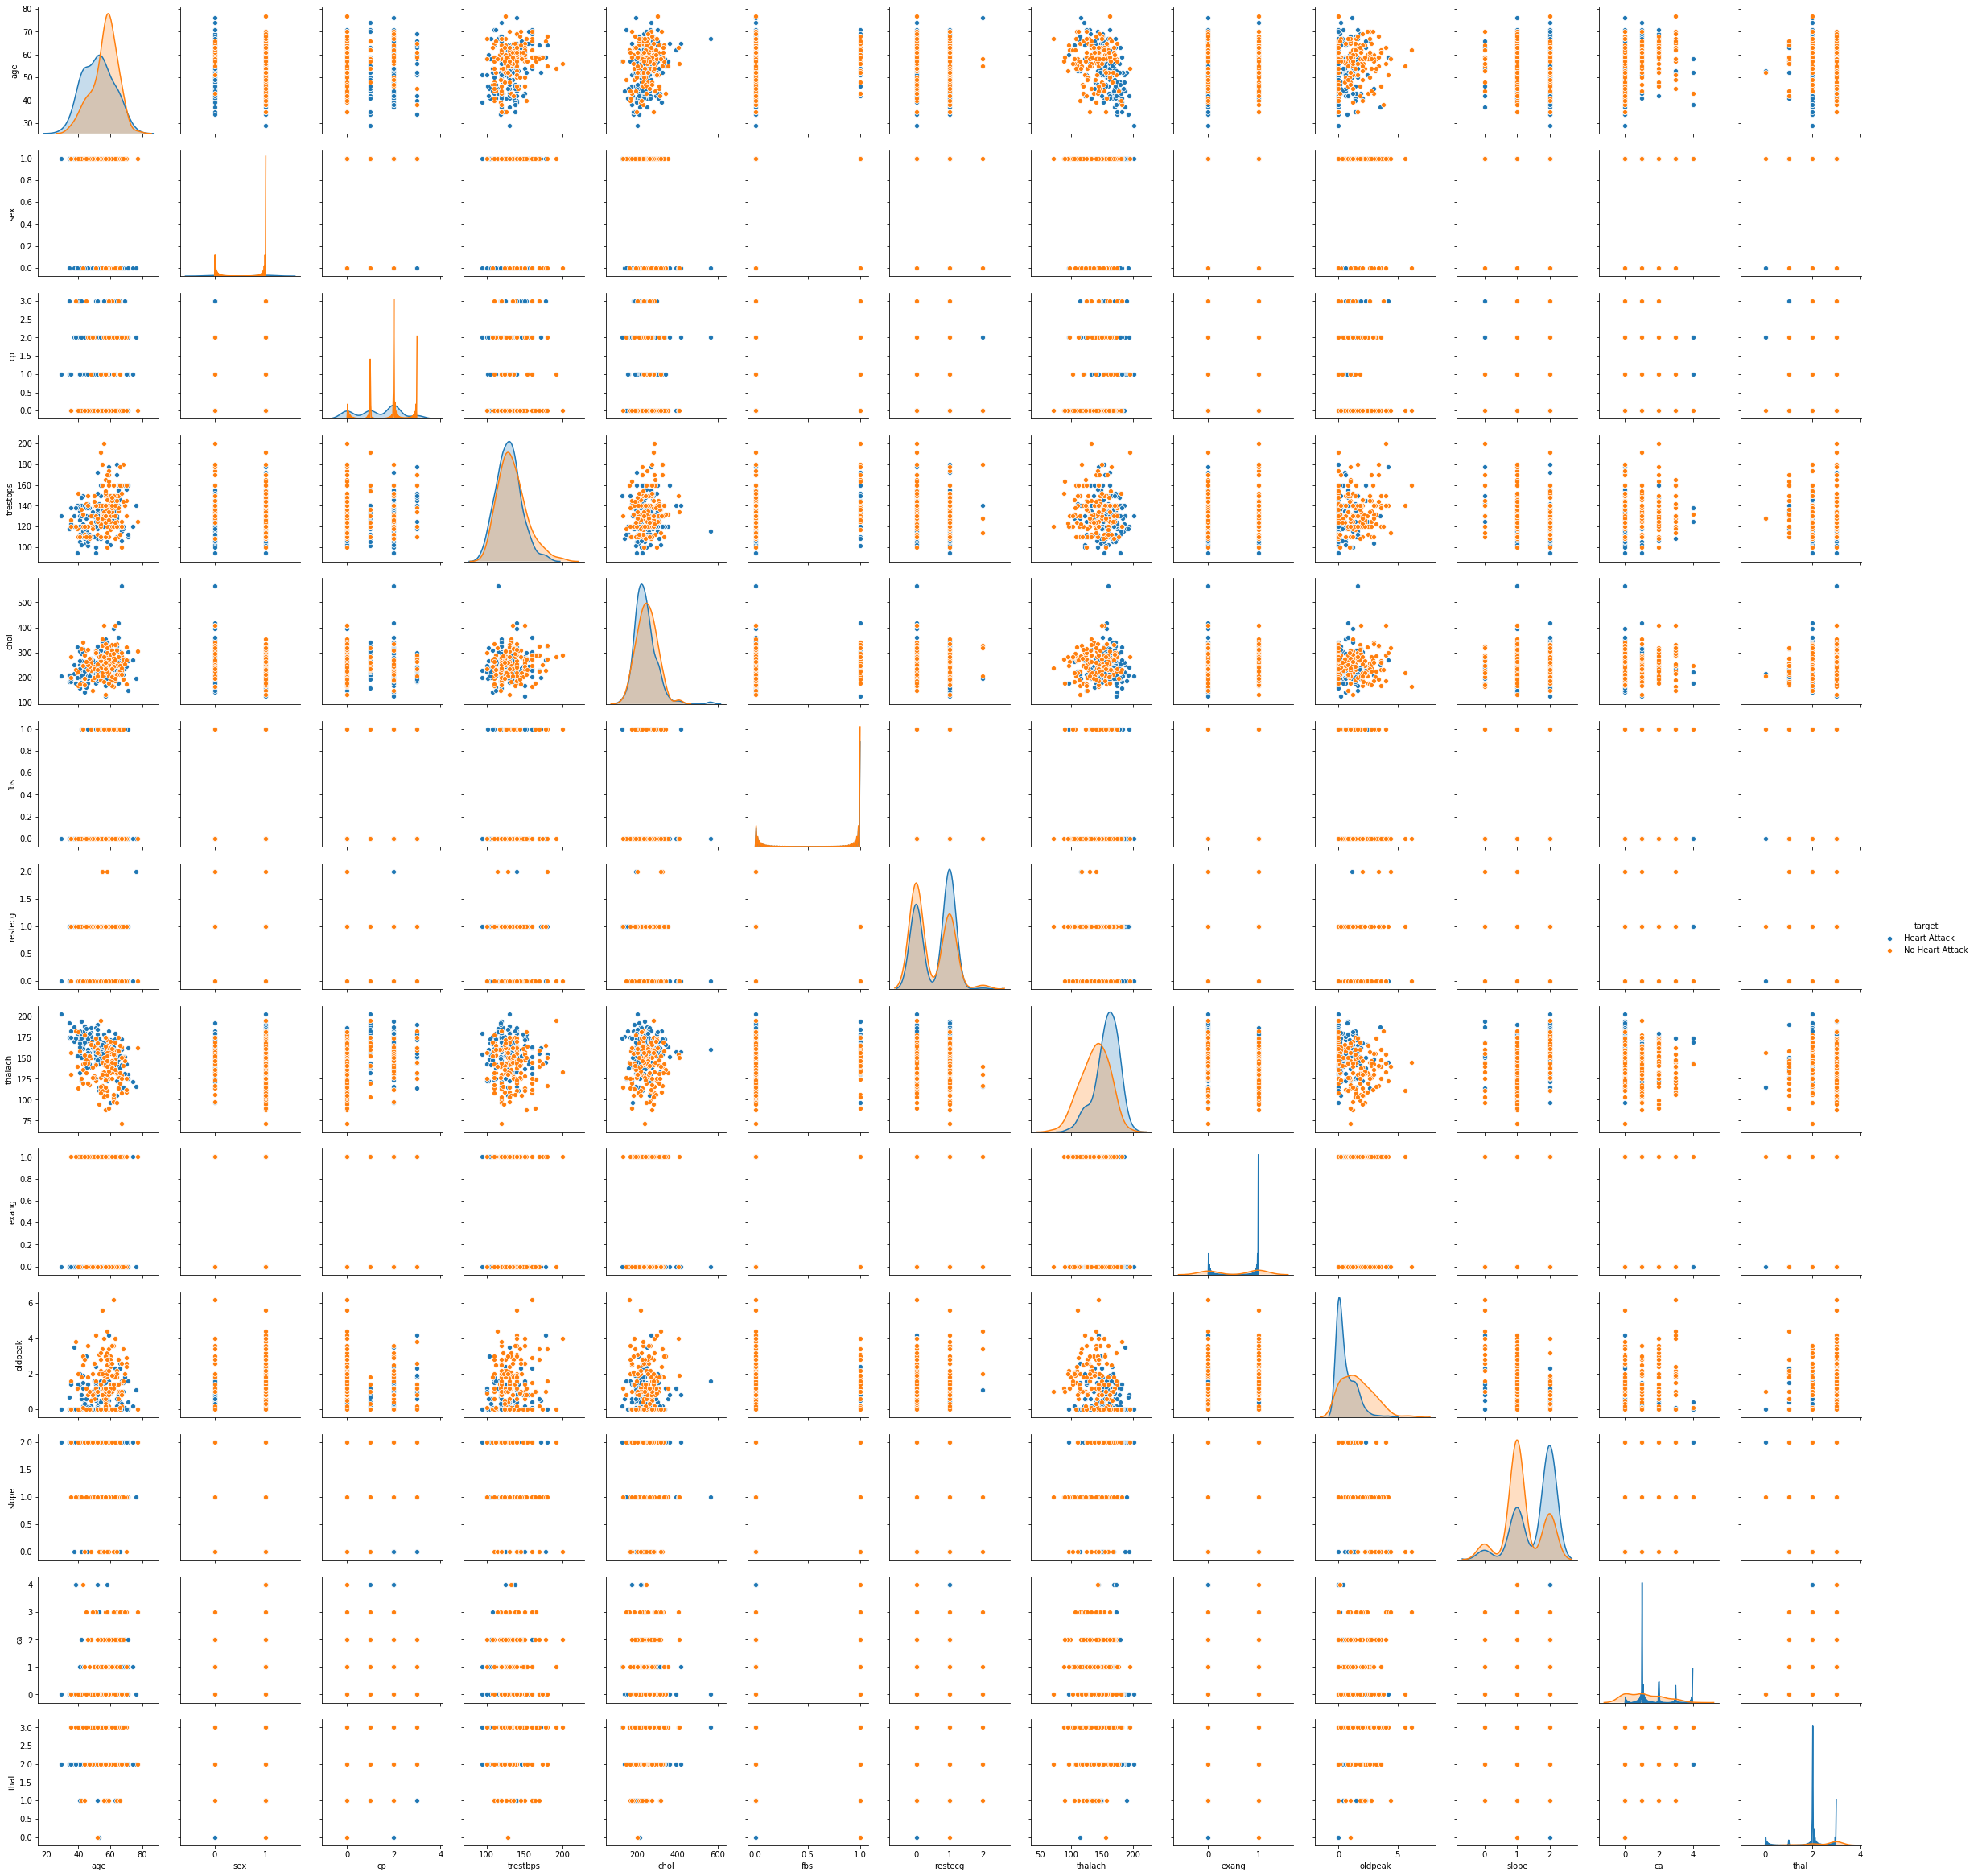

In [38]:
sns.pairplot(df,hue="target") # hue have dependent feature the outcome and other are independent

In [39]:
df=pd.read_csv("heart2.csv")
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [40]:
#splitting the dataset
x=df.drop('target',axis=1).values #independent features
y=df['target'].values # dependant feature

In [41]:
from sklearn.model_selection import train_test_split

xtr,xts,ytr,yts=train_test_split(x,y,test_size=0.25,random_state=0)

In [42]:
#ANN IMPORTANT LIBRARIES
# documentation - https://pytorch.org/tutorials/beginner/basics/intro.html

import torch
import torch.nn as nn # neural network
import torch.nn.functional as F

In [43]:
### first create tensors for ANN

xtr=torch.FloatTensor(xtr)
xts=torch.FloatTensor(xts)
#converts the values into floating point as it is cumpulsory for the independant features and not prerequisite for the dependant ones
ytr=torch.LongTensor(ytr) 
yts=torch.LongTensor(yts) 

In [44]:
df.shape

(303, 14)

In [45]:
# developing model with pytorch
#the initial class will have input features thats 1 less then the columns for the target, the hidden layers according to our choice, output feature

#RELU = Rectified Linear Unit

class ANN_Model(nn.Module): #this will inherit NN library
    def __init__(self,input_features=13,hidden1=20,hidden2=20,out_features=2): #Requires input features,hidden layers, multiple layers and output layer
        super().__init__()
        #fully connected layer ,to create a dense layer we have input features with hidden layer
        self.f_connected1=nn.Linear(input_features,hidden1)
        self.f_connected2=nn.Linear(hidden1,hidden2)
        self.out=nn.Linear(hidden2,out_features)
    def forward(self,x):
        #forwards propogation
        #tracks the gradient decent, it have all the activation functions
        # connect the fully connected neural network to the hidden layer with optimiser
        x=F.relu(self.f_connected1(x)) #parameter x has all the information connected to the layer
        x=F.relu(self.f_connected2(x))
        x=self.out(x)
        return x
    
    

In [46]:
# Instantiate our ANN_Model

torch.manual_seed(20)
model=ANN_Model()
#developed the model for the neural network

In [47]:
model.parameters # shows the features of the neural network we developed

<bound method Module.parameters of ANN_Model(
  (f_connected1): Linear(in_features=13, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [48]:
## backward Propogation-- define the LOSS function And Optimiser ( to reduce the gap between the difference of the required target)

#cross entropy loss function= for multi classification loss
loss_function=nn.CrossEntropyLoss()

# adam optimizer is best for these processes
# model.parameters() is know as a generator of the neural network
# learning rate should be optimum to find a global minima for the function thus 0.01
optimizer=torch.optim.Adam(model.parameters(),lr=0.01) 

In [49]:
#deploying the neural netowrk
epochs=500
final_losses=[]
for i in range(epochs):
    i+=1
    y_pred=model.forward(xtr)
    loss=loss_function(y_pred,ytr)
    final_losses.append(loss)
    if i%10==1:  #for every 10 epochs print the loss values
        print("Epoch Number: {} and the Loss : {}".format(i,loss.item()))
    #to reduce the loss we use the optimizer with the zero_grad = it creates the gradients of all optimised class
    optimizer.zero_grad()
    loss.backward() # performs back propogation
    optimizer.step() #performs the single optimizer step
    
    # the error due to the init arugument will be mitigated by adding brackets to the super init cause then it becomes eligible to inheriting the nn model

Epoch Number: 1 and the Loss : 1.585288643836975
Epoch Number: 11 and the Loss : 0.7845097780227661
Epoch Number: 21 and the Loss : 0.6453406810760498
Epoch Number: 31 and the Loss : 0.6282467842102051
Epoch Number: 41 and the Loss : 0.5851342082023621
Epoch Number: 51 and the Loss : 0.5572640895843506
Epoch Number: 61 and the Loss : 0.5346420407295227
Epoch Number: 71 and the Loss : 0.5109612941741943
Epoch Number: 81 and the Loss : 0.4826700687408447
Epoch Number: 91 and the Loss : 0.45413675904273987
Epoch Number: 101 and the Loss : 0.4170355796813965
Epoch Number: 111 and the Loss : 0.3786829113960266
Epoch Number: 121 and the Loss : 0.35754042863845825
Epoch Number: 131 and the Loss : 0.383836567401886
Epoch Number: 141 and the Loss : 0.3729555904865265
Epoch Number: 151 and the Loss : 0.34170418977737427
Epoch Number: 161 and the Loss : 0.3298411965370178
Epoch Number: 171 and the Loss : 0.3237072229385376
Epoch Number: 181 and the Loss : 0.31951767206192017
Epoch Number: 191 and

In [50]:
# plot the loss function
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 0, 'Epoch')

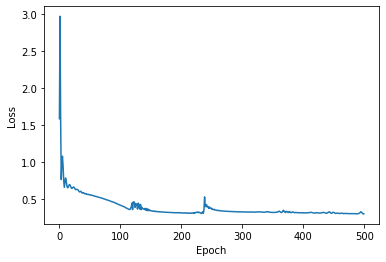

In [51]:
plt.plot(range(epochs),final_losses) # plot of all epoch to the list of every stored losses
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [55]:
# predicting the values

predictions=[]
with torch.no_grad(): #now we dont req gradient as its out final outcome 
    for i,data in enumerate(xts):
        y_pred=model(data)
        print(y_pred.argmax().item())
        predictions.append(y_pred.argmax().item())

0
1
1
0
0
0
0
0
0
0
1
1
0
1
1
1
0
1
0
1
1
0
0
0
1
0
0
0
1
0
0
0
1
0
1
1
0
1
0
0
0
1
0
0
1
1
1
1
0
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
0
0
1


In [59]:
# accuracy by comparision

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(yts,predictions)
cm

array([[26,  7],
       [ 6, 37]], dtype=int64)

Text(69.0, 0.5, 'Predicted Value')

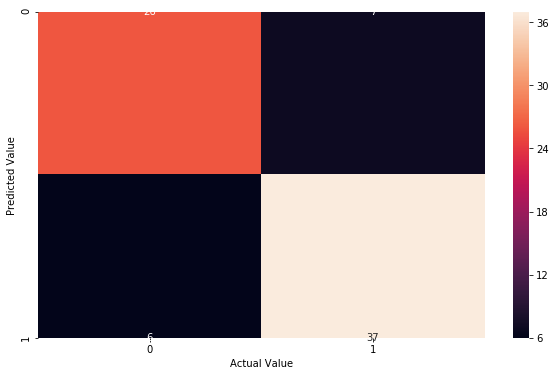

In [62]:
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")

In [63]:
from sklearn.metrics import accuracy_score
score=accuracy_score(yts,predictions)
score

0.8289473684210527

In [64]:
# save the model

torch.save(model,'heart_attack.pt')

In [66]:
#loading a neural model
model=torch.load('heart_attack.pt')

In [67]:
model.eval()

ANN_Model(
  (f_connected1): Linear(in_features=13, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)

In [72]:
# Prediction of new data point 
list(df.iloc[0,:-1])  
# took the values of the data for prediction
check1=[33.0, 2.0, 4.0, 115.0, 133.0, 1.0, 4.0, 150.0, 1.0, 2.3, 0.0, 0.0, 1.0]
check_final=torch.tensor(check1)
with torch.no_grad(): #now we dont req gradient as its out final outcome 
    y_pred=model(data)
    print(y_pred)
    print(y_pred.argmax().item())
    print(np.where(y_pred.argmax().item()==1,"Heart Attack","No Heart Attack "))

tensor([-0.9897,  1.7444])
1
Heart Attack
